<a href="https://colab.research.google.com/github/Undasnr/DL-ML/blob/main/Ronny_Binary_Classification_of_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Select features and categories for practice**

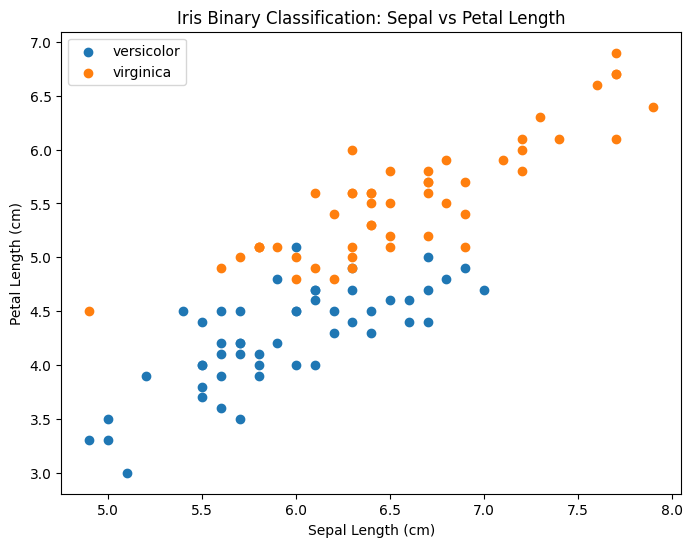

KNN Accuracy: 0.8333333333333334
Logistic Regression Accuracy: 0.8666666666666667
SVM Accuracy: 0.8666666666666667
Decision Tree Accuracy: 0.8333333333333334
Random Forest Accuracy: 0.8333333333333334


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# Loading iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

# Filtering for virgicolor and virginica
df_binary = df[df['target_name'].isin(['versicolor', 'virginica'])]

# Selecting features
X = df_binary[['sepal length (cm)', 'petal length (cm)']]
y = df_binary['target']


plt.figure(figsize=(8, 6))
for species in ['versicolor', 'virginica']:
    subset = df_binary[df_binary['target_name'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['petal length (cm)'], label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Iris Binary Classification: Sepal vs Petal Length')
plt.legend()
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predicting and evaluate
y_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


**Data Analysis**

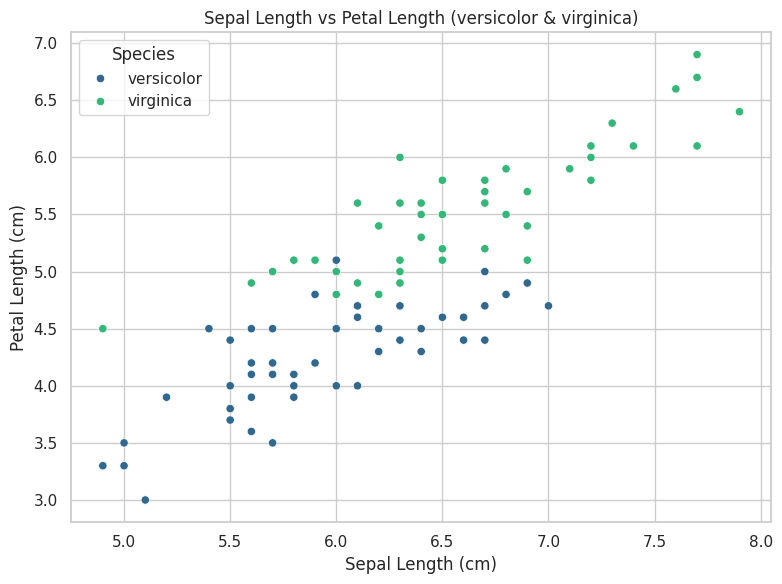

/tmp/ipython-input-1347040399.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_iris, x='species', y='petal_length', palette='viridis')


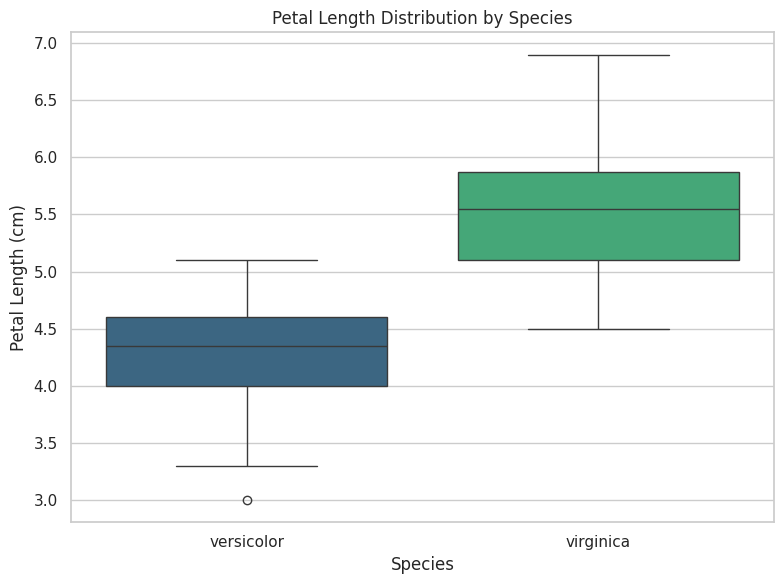

/tmp/ipython-input-1347040399.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_iris, x='species', y='sepal_length', palette='viridis')


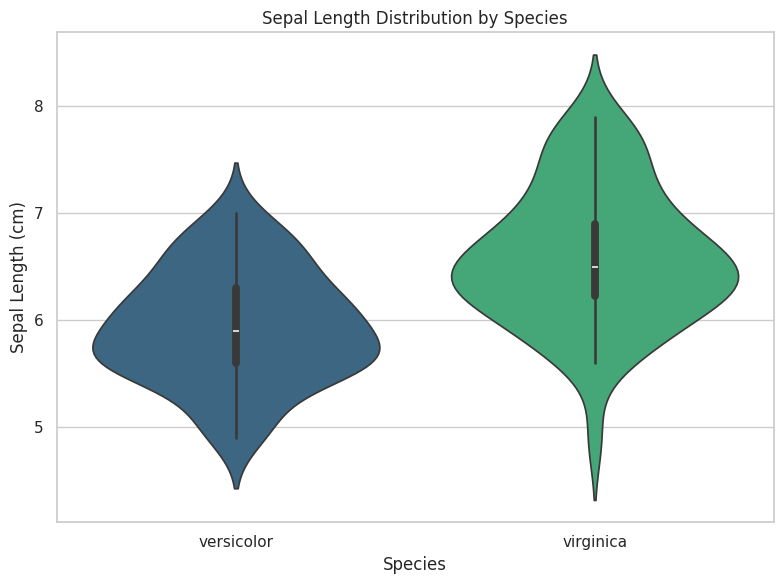

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Iris dataset from seaborn
iris = sns.load_dataset('iris')

# Filter for versicolor and virginica
filtered_iris = iris[iris['species'].isin(['versicolor', 'virginica'])]

# Set seaborn style
sns.set(style="whitegrid")

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_iris, x='sepal_length', y='petal_length', hue='species', palette='viridis')
plt.title('Sepal Length vs Petal Length (versicolor & virginica)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.tight_layout()
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_iris, x='species', y='petal_length', palette='viridis')
plt.title('Petal Length Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.tight_layout()
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=filtered_iris, x='species', y='sepal_length', palette='viridis')
plt.title('Sepal Length Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.tight_layout()
plt.show()

Splitting dataset into training data and validation data

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Converting DataFrame to NumPy arrays
X = df[iris.feature_names].to_numpy()
y = df['target'].to_numpy()

# Splitting the dataset into training and validation sets (75:25 ratio)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (112, 4)
X_val shape: (38, 4)
y_train shape: (112,)
y_val shape: (38,)


Pretreatment/Standardization

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Converting to DataFrames for better readability
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=iris.feature_names)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=iris.feature_names)

print("Scaled Training Data:")
print(X_train_scaled_df.head())

print("\nScaled Validation Data:")
print(X_val_scaled_df.head())


Scaled Training Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -1.473937          1.203658          -1.562535         -1.312603
1          -0.133071          2.992376          -1.276006         -1.045633
2           1.085898          0.085709           0.385858          0.289218
3          -1.230143          0.756479          -1.218701         -1.312603
4          -1.717731          0.309299          -1.390618         -1.312603

Scaled Validation Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.354517         -0.585060           0.557775          0.022248
1          -0.133071          1.650837          -1.161395         -1.179118
2           2.304867         -1.032239           1.818500          1.490583
3           0.232620         -0.361470           0.443164          0.422703
4           1.207795         -0.585060           0.615081          0.289218


Learning and Estimation

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data       # Features
y = iris.target     # Labels

# Splitting into training and validation sets (70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the feature values for better k-NN performance
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)

# Trying different values of n_neighbors: 1, 3, and 5
neighbors_settings = [1, 3, 5]
results = {}        # To store accuracy scores
predictions = {}    # To store predicted labels

# Training and evaluating k-NN for each value of n_neighbors
for n in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_std, y_train)                # Train on standardized training data
    y_pred = knn.predict(X_val_std)              # Estimate on validation data
    accuracy = accuracy_score(y_val, y_pred)     # Evaluate accuracy
    results[n] = accuracy
    predictions[n] = y_pred

for n in neighbors_settings:
    print(f"\n=== {n}-NN ===")
    print(f"Accuracy: {results[n]:.4f}")
    print("Predicted labels:", predictions[n])
    print("Actual labels:   ", y_val)



=== 1-NN ===
Accuracy: 0.9778
Predicted labels: [1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Actual labels:    [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]

=== 3-NN ===
Accuracy: 1.0000
Predicted labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Actual labels:    [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]

=== 5-NN ===
Accuracy: 1.0000
Predicted labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Actual labels:    [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


**Evaluation**

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Choosing one model to evaluate in detail (e.g., 5-NN)
n = 5
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_val_std)

# Calculating evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')
conf_matrix = confusion_matrix(y_val, y_pred)

print(f"\n=== Evaluation for {n}-NN ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)


=== Evaluation for 5-NN ===
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


**Visualization**

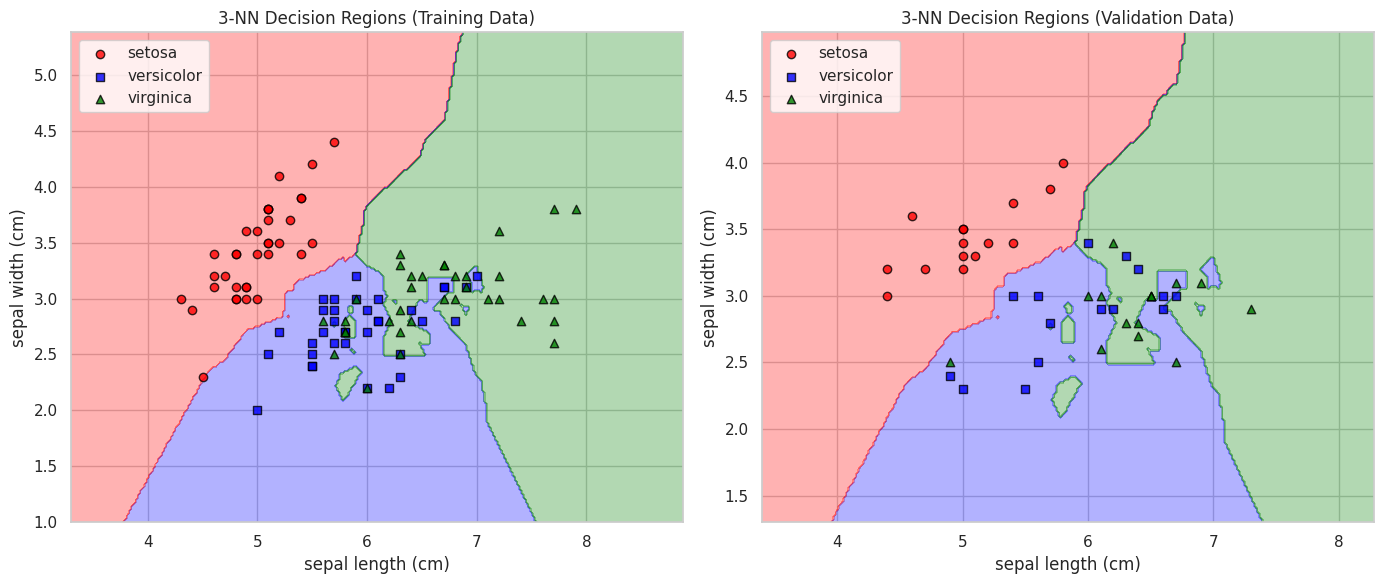

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Set plot style
sns.set(style='whitegrid')

iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for 2D visualization
y = iris.target

# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Training 3-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Defining decision region plotting function
def plot_decision_regions(X, y, classifier, title, ax):
    markers = ('o', 's', '^')
    colors = ('red', 'blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=colors[idx], marker=markers[idx],
                   label=iris.target_names[cl], edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.legend(loc='upper left')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_regions(X_train, y_train, knn, '3-NN Decision Regions (Training Data)', axes[0])
plot_decision_regions(X_val, y_val, knn, '3-NN Decision Regions (Validation Data)', axes[1])

plt.tight_layout()
plt.show()

**Learning by other methods**

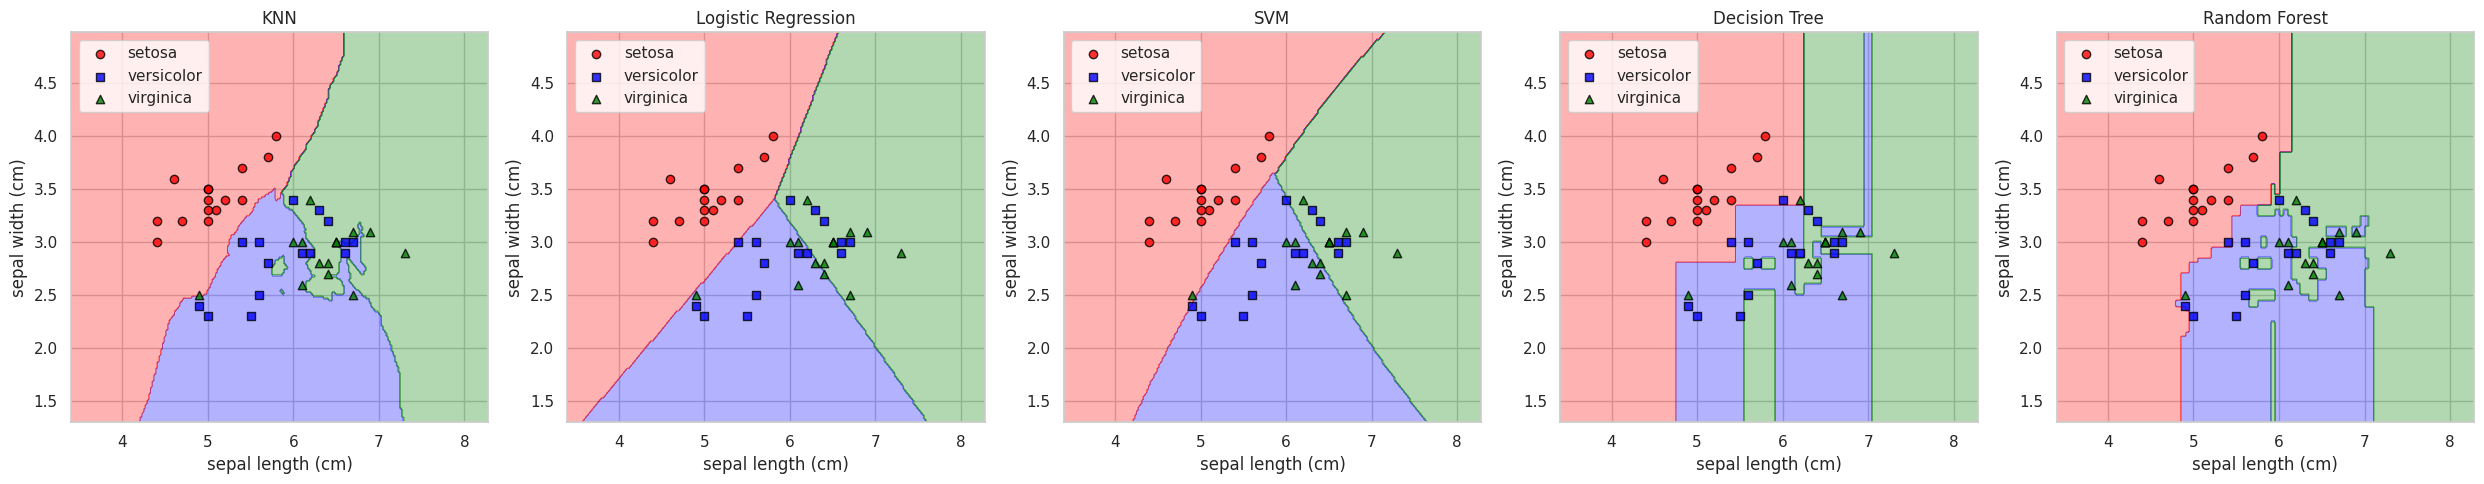

                 Model  Accuracy  Precision  Recall  F1 Score
0                  KNN     0.800      0.801   0.800     0.800
1  Logistic Regression     0.733      0.733   0.733     0.733
2                  SVM     0.733      0.726   0.733     0.728
3        Decision Tree     0.644      0.624   0.644     0.631
4        Random Forest     0.689      0.681   0.689     0.684


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

iris = load_iris()
X = iris.data[:, :2]  # Use first two features
y = iris.target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Classifiers
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Plotting function
def plot_decision_regions(X, y, classifier, title, ax):
    markers = ('o', 's', '^')
    colors = ('red', 'blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=colors[idx], marker=markers[idx],
                   label=iris.target_names[cl], edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.legend(loc='upper left')

# Evaluation and plotting
results = []
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred, average='macro'),
        "Recall": recall_score(y_val, y_pred, average='macro'),
        "F1 Score": f1_score(y_val, y_pred, average='macro')
    })
    plot_decision_regions(X_val, y_val, model, name, axes[i])

plt.tight_layout()
plt.show()

# Summary table
df_results = pd.DataFrame(results)
print(df_results.round(3))


**Comparison with and without comparison**

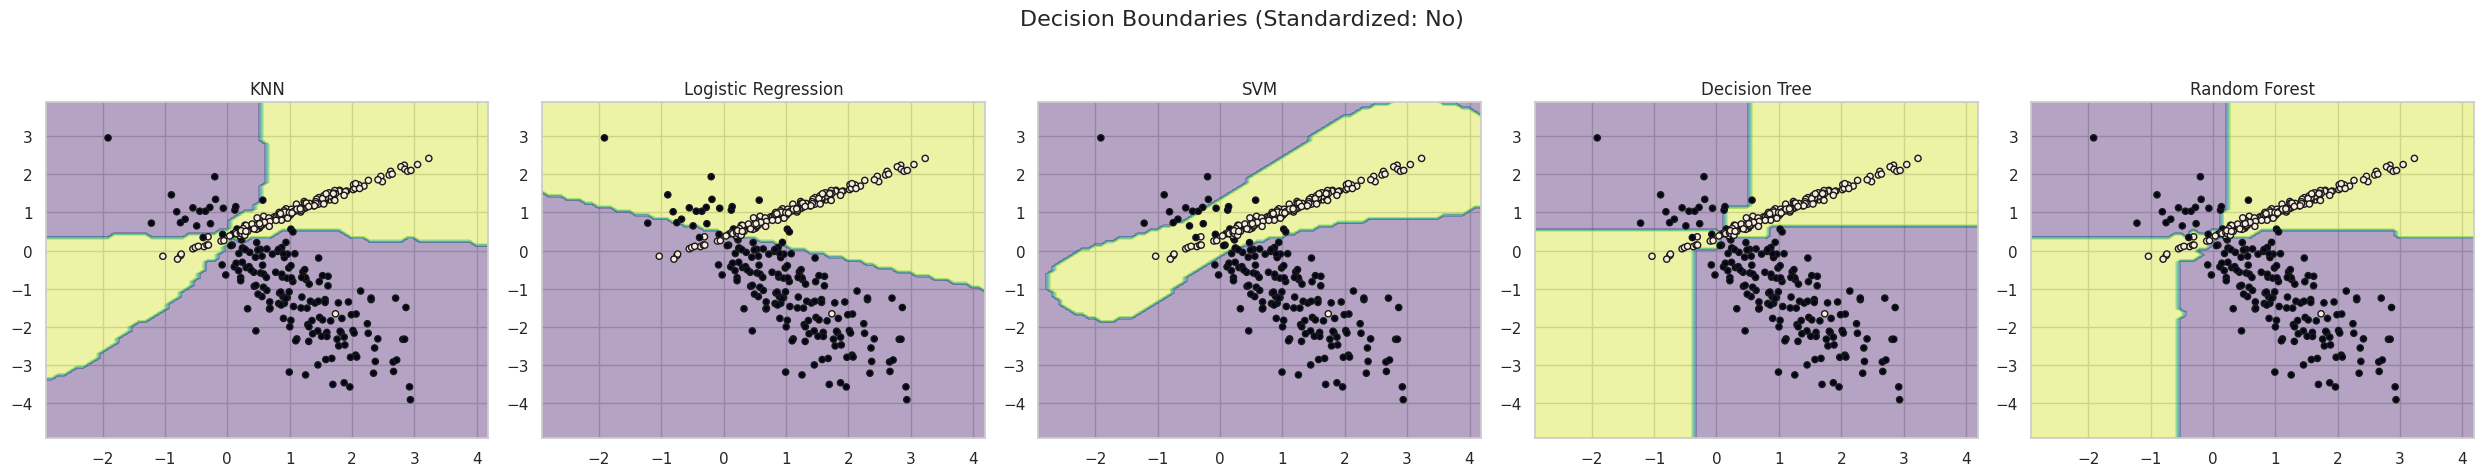

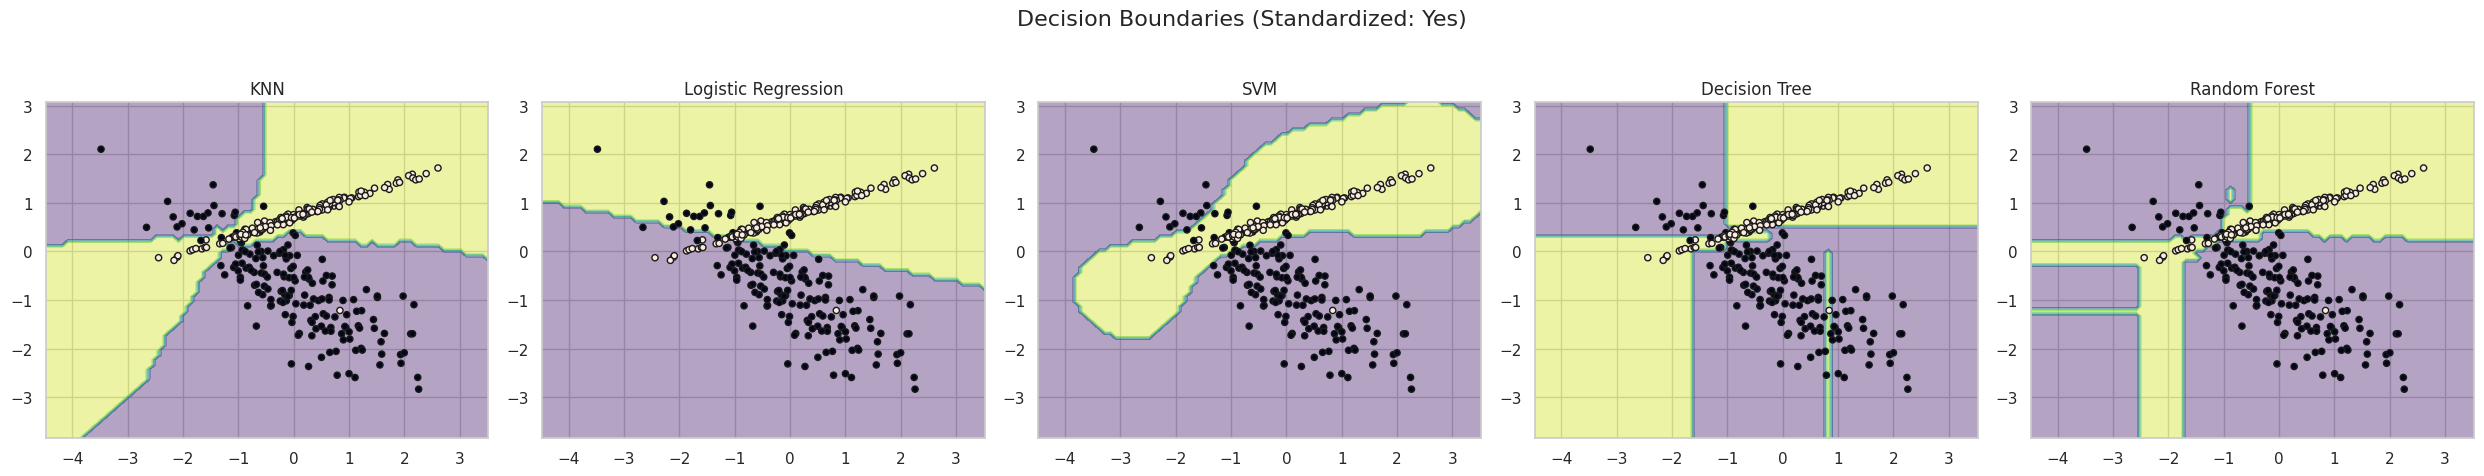

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Set style for plots
sns.set(style='whitegrid')

# Creating synthetic dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Function to evaluate models
results = []
def evaluate_models(X_train, X_test, y_train, y_test, label):
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        results.append({
            'Model': name,
            'Standardized': label,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred)
        })

# Evaluating without standardization
evaluate_models(X_train, X_test, y_train, y_test, 'No')

# Standardizing data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Evaluating with standardization
evaluate_models(X_train_std, X_test_std, y_train, y_test, 'Yes')

# Saving results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('classification_metrics_comparison.csv', index=False)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, standardized):
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))
    for ax, (name, clf) in zip(axes, classifiers.items()):
        clf.fit(X, y)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
        ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
        ax.set_title(name)
    fig.suptitle(f'Decision Boundaries (Standardized: {standardized})', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    filename = 'classification_boundaries_standardized.csv' if standardized == 'Yes' else 'classification_boundaries_non-standardized.csv'
    plt.show()

plot_decision_boundaries(X_train, y_train, 'No')
plot_decision_boundaries(X_train_std, y_train, 'Yes')


**Highly accurate method using all objective variables**


📋 KNN Classification Report:
              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        19
  versicolor      0.700     0.538     0.609        13
   virginica      0.625     0.769     0.690        13

    accuracy                          0.800        45
   macro avg      0.775     0.769     0.766        45
weighted avg      0.805     0.800     0.797        45



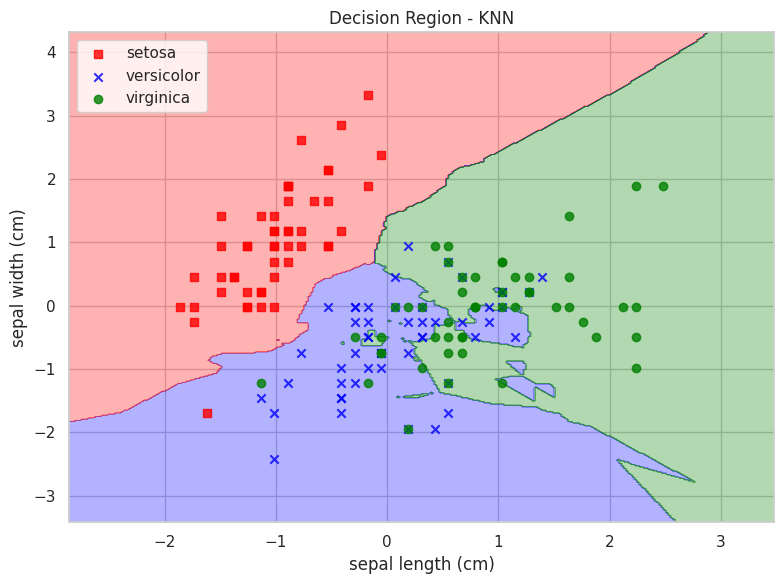


📋 Logistic Regression Classification Report:
              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        19
  versicolor      0.778     0.538     0.636        13
   virginica      0.647     0.846     0.733        13

    accuracy                          0.822        45
   macro avg      0.808     0.795     0.790        45
weighted avg      0.834     0.822     0.818        45



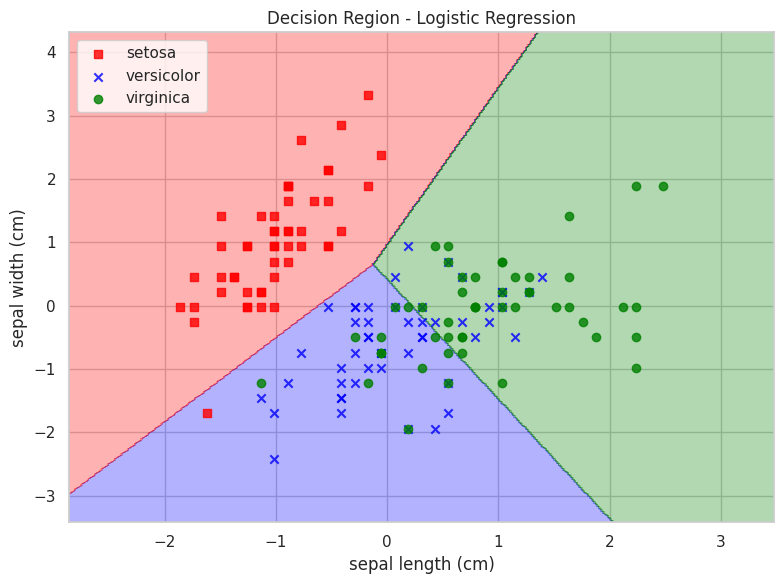


📋 SVM Classification Report:
              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        19
  versicolor      0.538     0.538     0.538        13
   virginica      0.538     0.538     0.538        13

    accuracy                          0.733        45
   macro avg      0.692     0.692     0.692        45
weighted avg      0.733     0.733     0.733        45



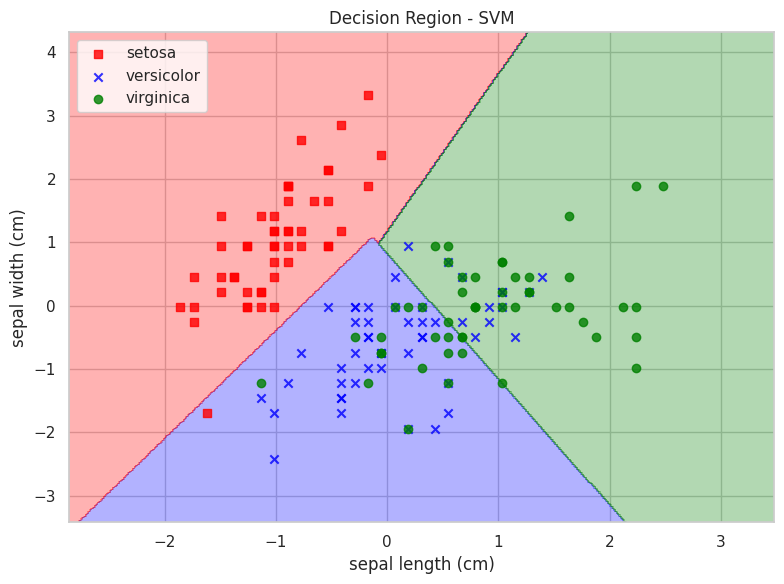


📋 Decision Tree Classification Report:
              precision    recall  f1-score   support

      setosa      1.000     0.947     0.973        19
  versicolor      0.462     0.462     0.462        13
   virginica      0.500     0.538     0.519        13

    accuracy                          0.689        45
   macro avg      0.654     0.649     0.651        45
weighted avg      0.700     0.689     0.694        45



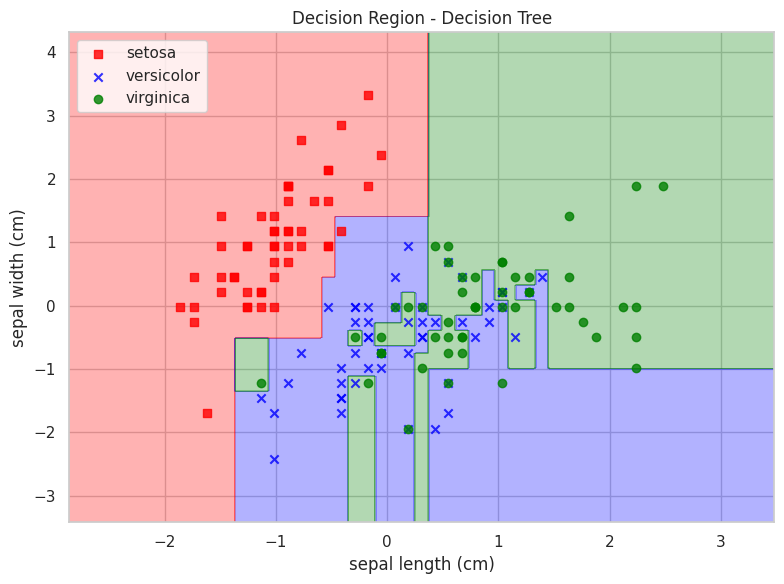


📋 Random Forest Classification Report:
              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        19
  versicolor      0.583     0.538     0.560        13
   virginica      0.571     0.615     0.593        13

    accuracy                          0.756        45
   macro avg      0.718     0.718     0.718        45
weighted avg      0.756     0.756     0.755        45



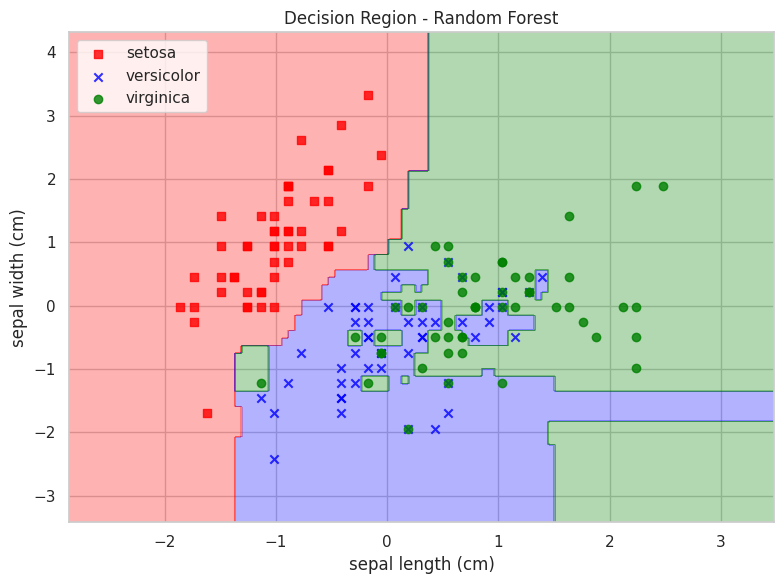

In [21]:
# 📦 Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only first two features for visualization
y = iris.target

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining classifiers
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'SVM': SVC(kernel='linear', probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, title):
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, 0.02),
        np.arange(x2_min, x2_max, 0.02)
    )
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=colors[idx], marker=markers[idx],
            label=iris.target_names[cl]
        )

    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(title)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# Training, evaluating, and visualizing
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"\n📋 {name} Classification Report:")
    print(classification_report(
        y_test, y_pred,
        target_names=iris.target_names,
        digits=3, zero_division=0
    ))

    plot_decision_regions(
        np.vstack((X_train, X_test)),
        np.hstack((y_train, y_test)),
        clf,
        title=f"Decision Region - {name}"
    )
